## Computing Alpha, Beta, and R Squared in Python 

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*Running a Regression in Python - continued:*

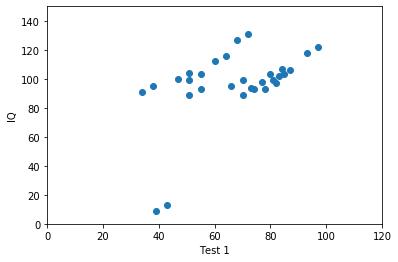

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

data = pd.read_excel('C:/Users/USER/Documents/Udemy Python for Finance/83 Computing Alpha, Beta, and R Squared in Python/Python 3/IQ_data.xlsx')

X = data['Test 1']
Y = data['IQ']

plt.scatter(X,Y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()

****

Use the statsmodels’ **.add_constant()** method to reassign the X data on X1. Use OLS with arguments Y and X1 and apply the fit method to obtain univariate regression results. Help yourself with the **.summary()** method. 

In [4]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [5]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Mon, 11 May 2020   Prob (F-statistic):            0.00411
Time:                        20:18:48   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By looking at the p-values, would you conclude Test 1 scores are a good predictor?

*****

Imagine a kid would score 84 on Test 1. How many points is she expected to get on the IQ test, approximately?

In [6]:
45 + 0.76*84

108.84

******

### Alpha, Beta, R^2:

Apply the stats module’s **linregress()** to extract the value for the slope, the intercept, the r squared, the p_value, and the standard deviation.

In [8]:
slope, intercept, r_value, p_value, std_error = stats.linregress(X,Y)

In [9]:
slope

0.758723457096734

In [10]:
intercept

45.88277660499194

In [11]:
r_value

0.5085667021566542

In [12]:
r_value ** 2

0.25864009054249504

In [13]:
p_value

0.004109055664218723

In [14]:
std_error

0.24275664244042755

Use the values of the slope and the intercept to predict the IQ score of a child, who obtained 84 points on Test 1. Is the forecasted value different than the one you obtained above?

In [15]:
intercept + 84 * slope

109.61554700111759

******

Follow the steps to draw the best fitting line of the provided regression.

Define a function that will use the slope and the intercept value to calculate the dots of the best fitting line.

In [16]:
def fitline(b):
    return intercept + slope * b

Apply it to the data you have stored in the variable X.

In [17]:
line = fitline(X)

Draw a scatter plot with the X and Y data and then plot X and the obtained fit-line.

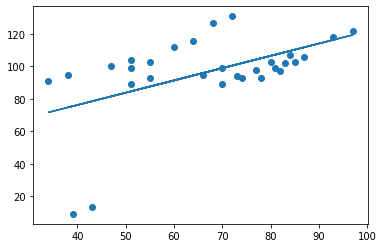

In [24]:
plt.scatter(X,Y) # draw scatter dots by X, Y
plt.plot(X,line) # draw a trend line by X vs line=fitline(X)=intercept+slope*X
plt.show()